# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [27]:
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import userdata
from sklearn.preprocessing import StandardScaler


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
%%capture
username = userdata.get('KAGGLE_USERNAME')
key = userdata.get('KAGGLE_KEY')
%env KAGGLE_USERNAME=$username
%env KAGGLE_KEY=$key

In [4]:
#!/bin/bash
!kaggle datasets download muhamedumarjamil/house-price-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/muhamedumarjamil/house-price-prediction-dataset
License(s): CC0-1.0
  0% 0.00/292k [00:00<?, ?B/s]
100% 292k/292k [00:00<00:00, 488MB/s]


In [5]:
!ls

house-price-prediction-dataset.zip  sample_data


In [6]:
!unzip house-price-prediction-dataset.zip

Archive:  house-price-prediction-dataset.zip
  inflating: house_prices_dataset.csv  


In [8]:
df  = pd.read_csv('house_prices_dataset.csv')
df

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903
...,...,...,...,...,...
9995,2650.551032,7,9,18.126034,431344.267823
9996,1000.827516,2,53,24.479692,6650.271134
9997,1647.341638,5,80,2.189312,233698.384301
9998,2247.882787,6,73,27.931014,280766.827379


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [9]:
# Info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   square_feet           10000 non-null  float64
 1   num_rooms             10000 non-null  int64  
 2   age                   10000 non-null  int64  
 3   distance_to_city(km)  10000 non-null  float64
 4   price                 10000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [10]:
# statiscal describe
df.describe()

,square_feet,num_rooms,age,distance_to_city(km),price
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1999.147496,4.49510,49.516900,15.362148,263011.571609
std,501.021194,1.71116,28.992336,8.325101,98336.945117
min,500.000000,2.00000,0.000000,1.000161,-95613.138249
25%,1663.704735,3.00000,24.000000,8.121636,196791.510684
50%,1998.702512,4.00000,49.000000,15.403146,262497.361236
75%,2335.540444,6.00000,75.000000,22.447530,330445.581908
max,3963.118853,7.00000,99.000000,29.993892,660168.255648


In [16]:
# Check data range (min and max)
print("Minimum values:")
print(df.min())
print("\nMaximum values:")
print(df.max())

Minimum values:
square_feet               500.000000
num_rooms                   2.000000
age                         0.000000
distance_to_city(km)        1.000161
price                  -95613.138249
dtype: float64

Maximum values:
square_feet               3963.118853
num_rooms                    7.000000
age                         99.000000
distance_to_city(km)        29.993892
price                   660168.255648
dtype: float64


In [14]:
# check unique column for each data
df.nunique()

,0
square_feet,9988
num_rooms,6
age,100
distance_to_city(km),10000
price,10000


In [11]:
# chek null
df.isnull().sum()

,0
square_feet,0
num_rooms,0
age,0
distance_to_city(km),0
price,0


In [12]:
# check duplicated
df.duplicated().sum()

np.int64(0)

array([[<Axes: title={'center': 'square_feet'}>,
        <Axes: title={'center': 'num_rooms'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'distance_to_city(km)'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

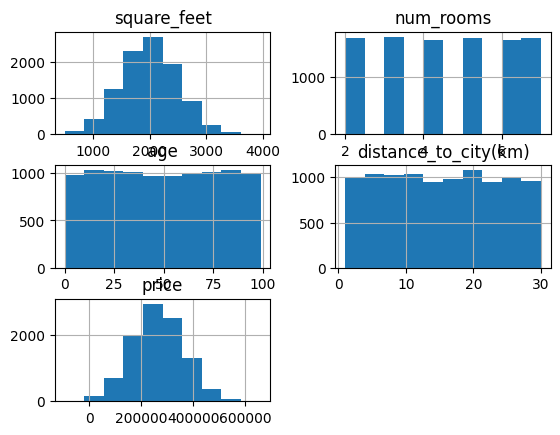

In [13]:
df.hist()

In [18]:
#check outlier

# Misal df sudah ada
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [21]:
df_outlier = df[(
    (df < (Q1 - 1.5 * IQR)) |
    (df > (Q3 + 1.5 * IQR))
).any(axis=1)]
df_outlier

,square_feet,num_rooms,age,distance_to_city(km),price
179,3360.084583,2,99,7.656454,406513.612495
209,3926.365745,7,0,19.343934,660168.255648
262,500.000000,3,76,12.561114,-14286.956405
471,849.039418,2,23,29.665812,-33373.818647
478,3539.440404,7,92,25.594193,435639.613594
...,...,...,...,...,...
9606,599.044215,2,33,19.913306,-36462.912810
9770,500.000000,3,2,5.999410,132002.234406
9787,2838.227481,7,29,1.086042,537102.221041
9834,3082.760726,7,16,13.937077,532605.602317


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [17]:
df_process = df.copy()

In [22]:
# remove outlier
df_process  = df_process[~(
    (df < (Q1 - 1.5 * IQR)) |
    (df > (Q3 + 1.5 * IQR))
).any(axis=1)]

In [25]:
len(df_process)

9878

In [30]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_process[["square_feet", "num_rooms", "age", "distance_to_city(km)"]])

In [33]:
df_scaled = pd.DataFrame(scaled_features,
                         columns=["square_feet", "num_rooms", "age", "distance_to_city(km)"])
df_scaled.head()

,square_feet,num_rooms,age,distance_to_city(km)
0,0.517307,-0.875011,1.465649,0.918328
1,-0.142402,-1.460445,-0.947953,-0.166129
2,0.674161,0.881293,-0.568673,0.738218
3,1.583594,-0.875011,0.465728,-0.604138
4,-0.242025,1.466728,0.155408,1.217571
